## The Target is (medina_house_value), and Evaluation Metric is (RMSE)

### Import the main Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
import os, joblib, missingno

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from xgboost import XGBRegressor

### Read the Data

In [5]:
FILE_PATH = os.path.join(os.getcwd(), 'housing.csv')

housing_df =  pd.read_csv(FILE_PATH)
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Look at the Dataset

In [6]:
# Check some info about the dataset
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
# Check nulls
housing_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:>

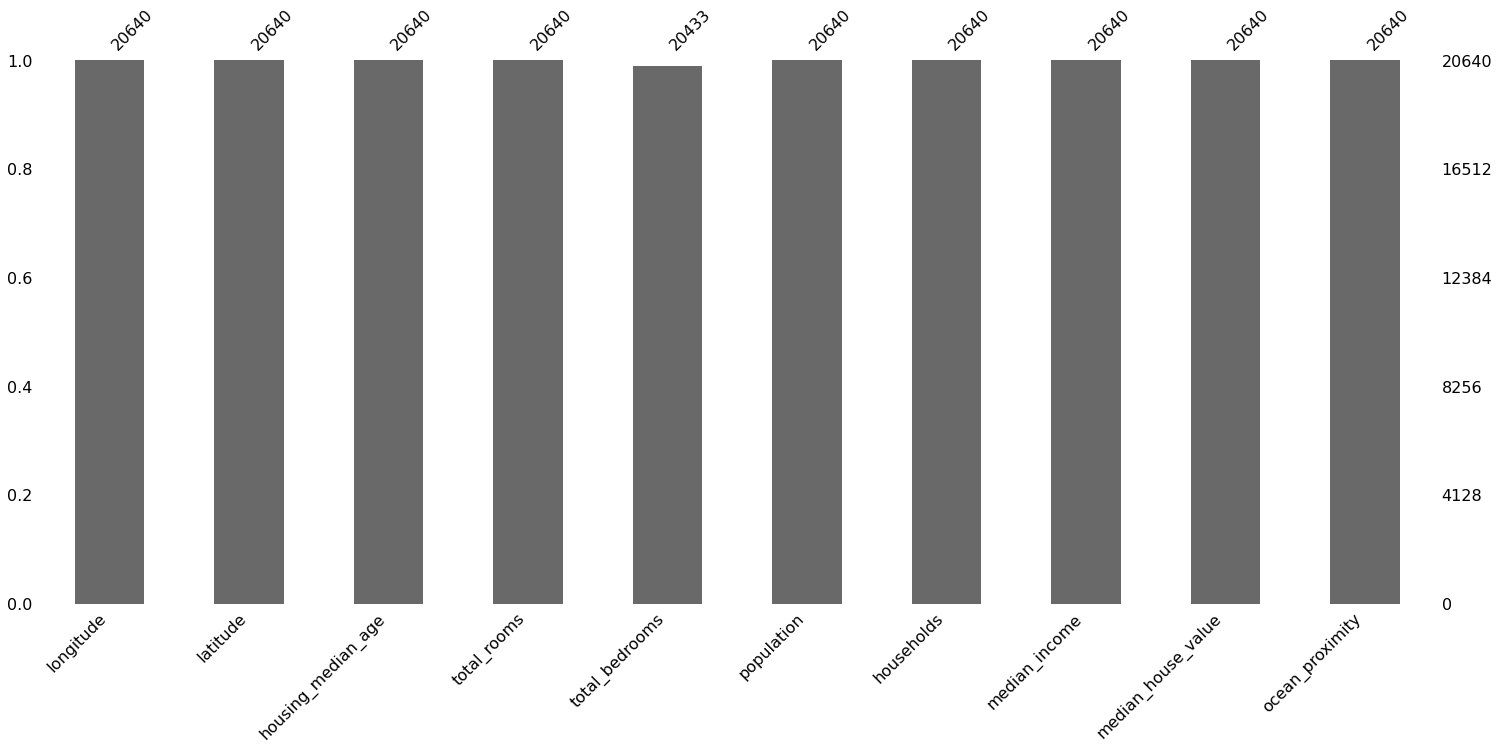

In [12]:
# Check nulls using (missingno) library
msn.bar(housing_df)

> **Comment**: It seems that Dataset is a contains 20640 instances and only 207 null values in total_bedrooms feature

### Exploratory Data Analysis

*Univariate Visualization*

Categories of (ocean_proximity): 
 <1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


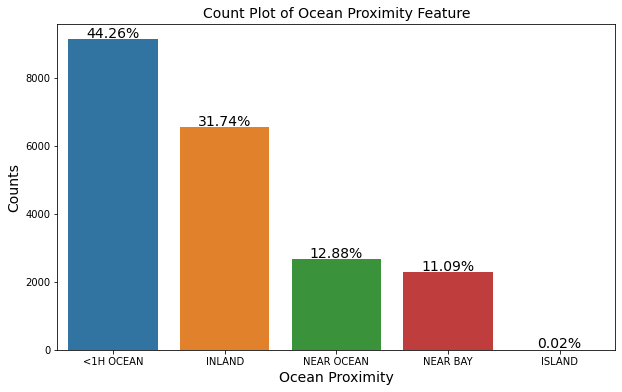

In [26]:
# Check number of categories of ocean_proximity feature
ocean_values = housing_df['ocean_proximity'].value_counts()
print('Categories of (ocean_proximity): \n',ocean_values)

# Plot number of categories of ocean_proximity feature
plt.figure(figsize=(10, 6))
sns.countplot(x='ocean_proximity', data=housing_df, order=ocean_values.index)
plt.title('Count Plot of Ocean Proximity Feature', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')

# Get percentage of each bar
for index in range(len(ocean_values)):
    each_value = ocean_values.values[index]
    each_percentage = f'{((each_value / len(housing_df)) * 100):.2f}%'
    plt.text(x=index, y=each_value + 50, s=each_percentage, c='k', fontsize=14, ha='center')

In [29]:
# Replace the  (<1H OCEAN) to (1H OCEAN)
housing_df['ocean_proximity'] = housing_df['ocean_proximity'].replace('<1H OCEAN', '1H OCEAN')
housing_df[housing_df['ocean_proximity'] == '1H OCEAN']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20502,-118.68,34.33,45.0,121.0,25.0,67.0,27.0,2.9821,325000.0,1H OCEAN
20503,-118.75,34.33,27.0,534.0,85.0,243.0,77.0,8.2787,330000.0,1H OCEAN
20504,-118.73,34.29,11.0,5451.0,736.0,2526.0,752.0,7.3550,343900.0,1H OCEAN
20505,-118.72,34.29,22.0,3266.0,529.0,1595.0,494.0,6.0368,248000.0,1H OCEAN


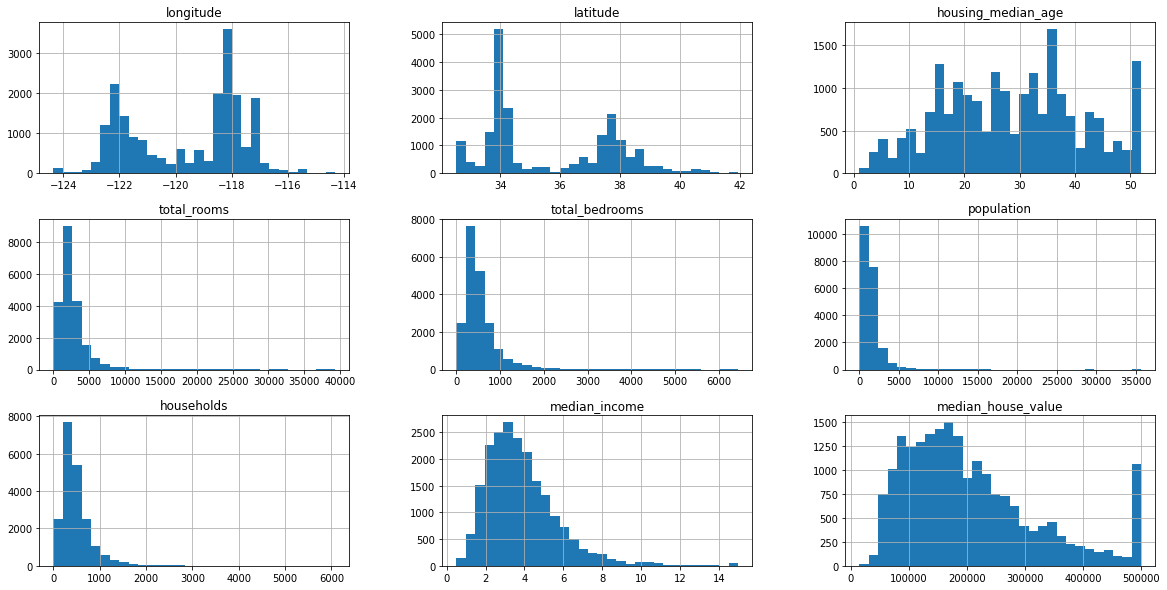

In [31]:
# Histogram Distribution of Numerical Features
housing_df.hist(bins=30, figsize=(20, 10))
plt.show()

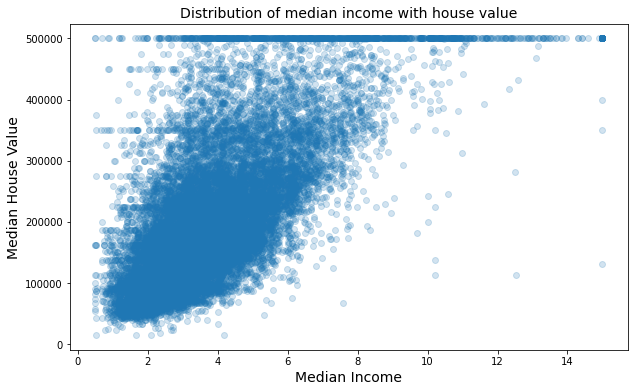

In [33]:
# Scatterplot with important Feature (medina_income) with the target (median_house_value)

plt.figure(figsize=(10, 6))
plt.scatter(housing_df['median_income'], housing_df['median_house_value'], alpha=0.2)
plt.title('Distribution of median income with house value', fontsize=14, c='k')
plt.xlabel('Median Income', fontsize=14, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
plt.show()

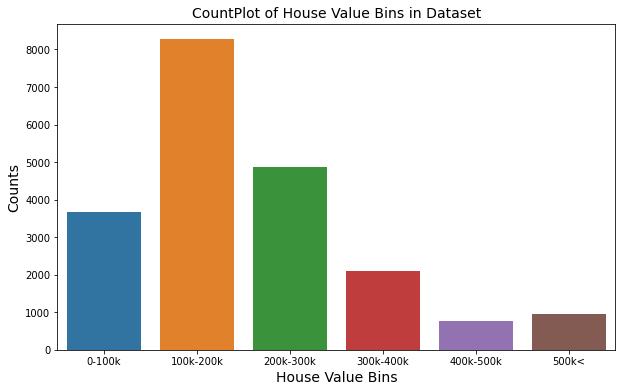

In [36]:
###### Try for (median_house_value) to convert it into chunks (bins)
house_value_bins = pd.cut(x=housing_df['median_house_value'], 
                           bins=[-np.inf, 100000, 200000, 300000, 400000, 500000, np.inf],
                          labels=['0-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k<'])

# Countplot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=house_value_bins)
plt.title('CountPlot of House Value Bins in Dataset', fontsize=14, c='k')
plt.xlabel('House Value Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

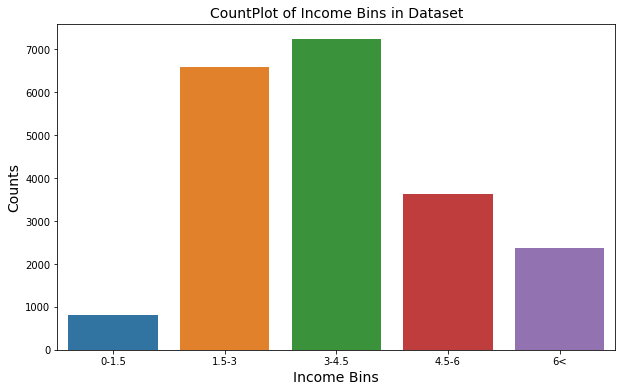

In [37]:
# Try for (median_income) to convert it into chunks (bins)
house_income_bins = pd.cut(x=housing_df['median_income'], 
                           bins=[-np.inf, 1.5, 3, 4.5, 6, np.inf],
                          labels=['0-1.5', '1.5-3', '3-4.5', '4.5-6', '6<'])

# Countplot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=house_income_bins)
plt.title('CountPlot of Income Bins in Dataset', fontsize=14, c='k')
plt.xlabel('Income Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

**Bivariate Visualization**

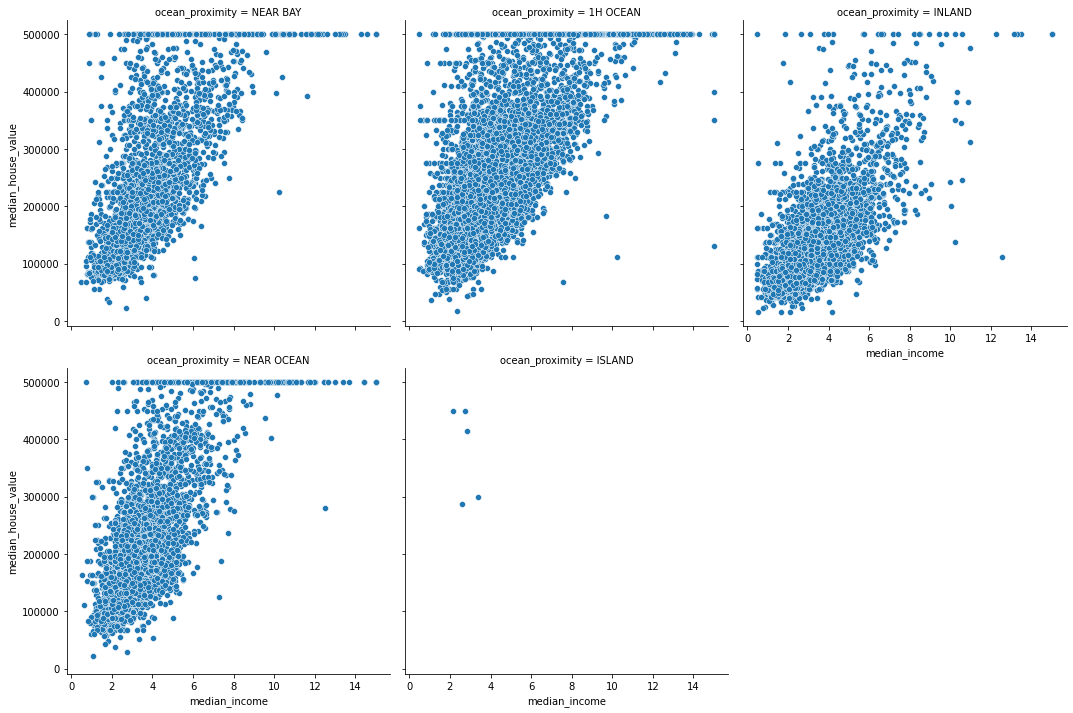

In [39]:
# Scatterplot with (median_income) & (median_house_value) at each (ocean_proximity)
sns.relplot(x='median_income', y='median_house_value', data=housing_df, kind='scatter', 
            col='ocean_proximity', col_wrap=3)
plt.show()

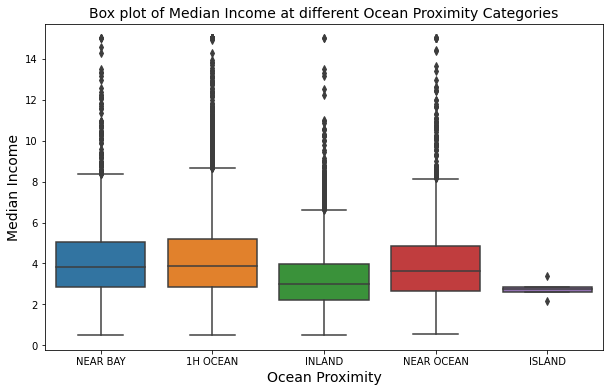

In [40]:
# Check the BoxPlot of the (median_income) at different Categories of (ocean_proximity)
plt.figure(figsize=(10, 6))
sns.boxplot(y='median_income', data=housing_df, x='ocean_proximity')
plt.title('Box plot of Median Income at different Ocean Proximity Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median Income', fontsize=14, c='k')
plt.show()

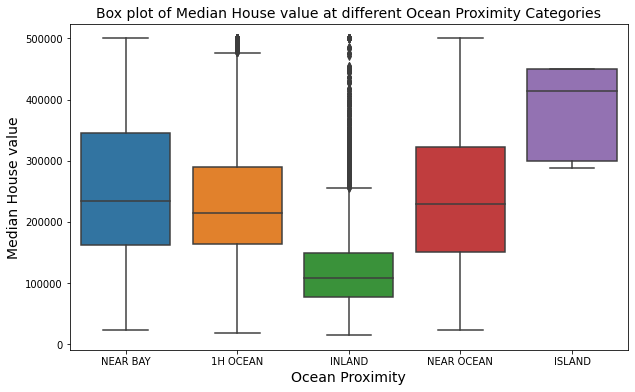

In [41]:
# Check the BoxPlot of the (median_house_value) at different Categories of (ocean_proximity)
plt.figure(figsize=(10, 6))
sns.boxplot(y='median_house_value', data=housing_df, x='ocean_proximity')
plt.title('Box plot of Median House value at different Ocean Proximity Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median House value', fontsize=14, c='k')
plt.show()

**Multivariate Visualization**

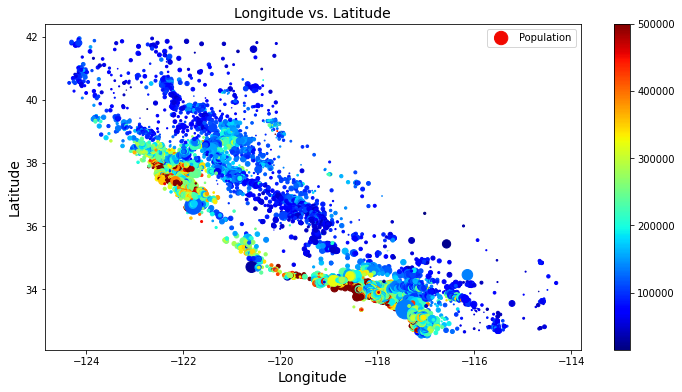

In [42]:
# ScatterPlot for (longitude & Latitude), and add (population) as size of point, and the color as (median_house_value)
plt.figure(figsize=(12, 6))
sc = plt.scatter(x=housing_df['longitude'], y=housing_df['latitude'], 
                 s=housing_df['population']/100, c=housing_df['median_house_value'], 
                 cmap=plt.get_cmap('jet'), label='Population')
plt.colorbar(sc)   ## colorbar
plt.xlabel('Longitude', fontsize=14, c='k')
plt.ylabel('Latitude', fontsize=14, c='k')
plt.title('Longitude vs. Latitude', fontsize=14, c='k')
plt.legend()
plt.show()

> **Comment**: It seems that prices is higher near the ocean than other zones, and also these araes have higher population

**Check the Correlation between the Features and Target**

In [44]:
# Using pearson correlation
housing_df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

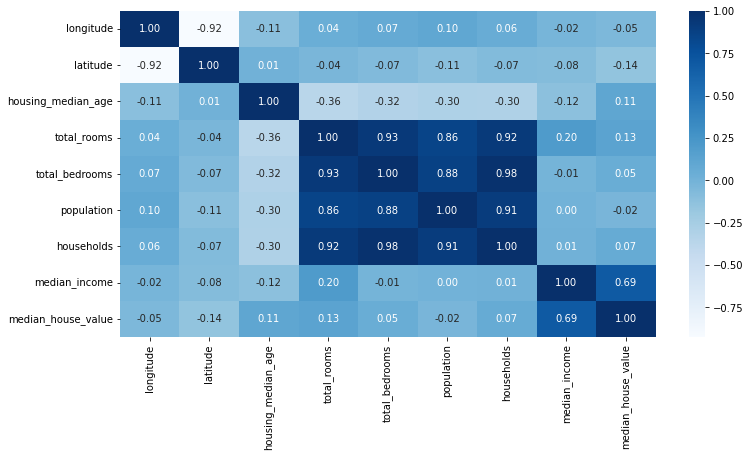

In [45]:
# show this as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(housing_df.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.show()

> **Comment**: It seems that the most correlated Feature with target is (median_income) as I predict that, and feature like (households & population) are less correlated

**Feature Engineering**

In [47]:
# Try to make some Feature Engineering --> Feature Extraction --> Add the new column to the main DF
housing_df['rooms_per_household'] = housing_df['total_rooms'] / housing_df['households']
housing_df['bedroms_per_rooms'] = housing_df['total_bedrooms'] / housing_df['total_rooms']
housing_df['population_per_household'] = housing_df['population'] / housing_df['households']

In [48]:
# check the correlation again
housing_df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedroms_per_rooms          -0.255880
Name: median_house_value, dtype: float64

> **Comment**:Some progress for out new features (very good), Strong correlation